<a href="https://colab.research.google.com/github/Manuraj269/SkimLit/blob/main/SkimLit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi


Fri Jul 15 12:03:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    32W /  70W |   3106MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

fatal: destination path 'pubmed-rct' already exists and is not an empty directory.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign"

In [ ]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [ ]:
import os
filenames=[data_dir + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_signdev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_signtest.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_signtrain.txt']

In [ ]:
def get_lines(filename):
  with open(filename, "r") as f:
    return f.readlines()

In [ ]:
train_lines= get_lines(data_dir + "/train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
len(train_lines)

210040

In [ ]:
def preprocess_text_with_line_numbers(filename):
  input_lines= get_lines(filename)
  abstract_lines=""
  abstract_samples= []

  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines= ""
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()

      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data= {}
        target_text_split = abstract_line.split("\t")
        line_data["target"] = target_text_split[0]
        line_data["text"]= target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"]= len(abstract_line_split)-1
        abstract_samples.append(line_data) 
    else:
      abstract_lines+= line

  return abstract_samples

In [ ]:
train_samples= preprocess_text_with_line_numbers(data_dir+ "/train.txt")
val_samples= preprocess_text_with_line_numbers(data_dir+ "/dev.txt")
test_samples = preprocess_text_with_line_numbers(data_dir+"/test.txt")

print(len(train_samples), len(val_samples), len(test_samples))


180040 30212 30135


In [ ]:
train_samples[:10]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

In [ ]:
import pandas as pd

In [ ]:
train_df= pd.DataFrame(train_samples)
val_df= pd.DataFrame(val_samples)
test_df= pd.DataFrame(test_samples)
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [ ]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

In [ ]:
train_sentences= train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences=  test_df["text"].tolist()
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot= one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1,1))
train_labels_one_hot


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=  LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded=  label_encoder.fit_transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.fit_transform(test_df["target"].to_numpy())

train_labels_encoded


array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
num_classes = len(label_encoder.classes_)
class_names= label_encoder.classes_



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tf-idf",TfidfVectorizer(),),
    ("clf",MultinomialNB())
])

model_0.fit(X = train_sentences, y = train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(X = val_sentences, y = val_labels_encoded)


0.7218323844829869

In [ ]:
baseline_preds = model_0.predict(test_sentences)
baseline_preds

array([2, 2, 2, ..., 4, 4, 4])

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.pyhttps://raw.githi

--2022-07-15 12:03:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.pyhttps://raw.githi
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.pyhttps:/raw.githi [following]
--2022-07-15 12:03:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.pyhttps:/raw.githi
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 404 Not Found
2022-07-15 12:03:10 ERROR 404: Not Found.



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import calculate_results

--2022-07-15 12:03:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2022-07-15 12:03:11 (6.97 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
import numpy as np
import tensorflow
from tensorflow.keras import layers


In [ ]:
sent_lens= [len(sentences.split()) for sentences in train_sentences]

avg = np.mean(sent_lens)
avg

26.338269273494777

(array([4.2075e+04, 8.3771e+04, 3.6877e+04, 1.0945e+04, 3.9310e+03,
        1.4450e+03, 5.6000e+02, 2.2600e+02, 1.0100e+02, 4.5000e+01,
        2.0000e+01, 1.2000e+01, 9.0000e+00, 1.0000e+01, 6.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.  ,  15.75,  30.5 ,  45.25,  60.  ,  74.75,  89.5 , 104.25,
        119.  , 133.75, 148.5 , 163.25, 178.  , 192.75, 207.5 , 222.25,
        237.  , 251.75, 266.5 , 281.25, 296.  ]),
 <a list of 20 Patch objects>)

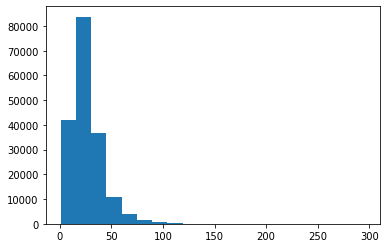

In [ ]:
import matplotlib.pyplot as plt 
plt.hist(sent_lens, bins=20)

In [ ]:
output_seq_len = int(np.percentile(sent_lens,95))
output_seq_len

55

In [ ]:
max_tokens= 68000

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens= max_tokens, 
                                    output_sequence_length = output_seq_len)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"), 
print(f"Most common words in the vocabulary: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocabulary: {rct_20k_text_vocab[-5:]}")

Number of words in vocabulary: 64841
Most common words in the vocabulary: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocabulary: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
token_embed= layers.Embedding(input_dim = len(rct_20k_text_vocab),
                            output_dim = 128,
                            mask_zero=True,
                            name="token")

In [ ]:
train_labels_one_hot.shape

(180040, 5)

In [ ]:
import tensorflow as tf
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot))
valid_dataset= tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset= tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_one_hot))

train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
train_dataset= train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset= valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset= test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile

In [ ]:
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics= ["accuracy"],
                run_eagerly=True)


In [ ]:
model_1.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 55)               0         
 ectorization)                                                   
                                                                 
 token (Embedding)           (None, 55, 128)           8299648   
                                                                 
 conv1d_2 (Conv1D)           (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_11 (Dense)            (None, 5)                 325

In [ ]:
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
history_1=  model_1.fit(train_dataset,
                        steps_per_epoch=int(0.1*len(train_dataset)),
                        epochs=3,
                        validation_data=valid_dataset,
                        validation_steps=int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 18s 32ms/step - loss: 0.9146 - accuracy: 0.6369 - val_loss: 0.6802 - val_accuracy: 0.7410
Epoch 2/3
562/562 [==============================] - 16s 29ms/step - loss: 0.6515 - accuracy: 0.7601 - val_loss: 0.6238 - val_accuracy: 0.7699
Epoch 3/3
562/562 [==============================] - 16s 29ms/step - loss: 0.6124 - accuracy: 0.7767 - val_loss: 0.5939 - val_accuracy: 0.7829


In [ ]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 16s 16ms/step - loss: 0.5940 - accuracy: 0.7873


[0.5940326452255249, 0.7872699499130249]

In [ ]:
model_1_pred_probs= model_1.predict(valid_dataset)
model_1_pred_probs.shape

(30212, 5)

In [ ]:
model_1_preds= tf.argmax(model_1_pred_probs,axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
model_1_results= calculate_results(val_labels_encoded,model_1_preds)

In [ ]:
model_1_results

{'accuracy': 78.7269958956706,
 'f1': 0.7847849446197488,
 'precision': 0.7845347751862649,
 'recall': 0.7872699589567059}

In [ ]:
import tensorflow_hub as hub 
tf_hub_embedding_layers= hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False)

In [ ]:
import random
rand= random.choice(train_sentences)
emb= tf_hub_embedding_layers([rand])
print(emb)

tf.Tensor(
[[-4.79177525e-03  2.69682873e-02  2.50383429e-02 -7.11198896e-02
  -2.44358443e-02 -1.26295425e-02  5.22018224e-02 -1.94925559e-03
  -4.65728901e-03  8.06979761e-02  4.44795676e-02 -4.68494147e-02
   6.97031841e-02  7.62194991e-02  1.13989320e-02 -3.52137126e-02
   1.74869634e-02  4.89826053e-02  7.28465989e-02 -5.48061654e-02
  -3.69270742e-02  5.37008159e-02 -8.55144188e-02 -2.56491285e-02
  -1.69564260e-03  7.79578164e-02 -2.48758048e-02 -6.87917694e-02
  -3.54296557e-04 -2.31639333e-02 -2.01224834e-02 -1.99412709e-04
  -4.56807651e-02  5.40085416e-03 -5.36430739e-02  3.60039882e-02
  -6.91556558e-02 -1.38865169e-02 -1.67027302e-02 -4.36036661e-02
   5.14875762e-02  7.60292932e-02 -3.44543457e-02 -5.77890798e-02
   3.22239920e-02  4.12832946e-02 -2.38759518e-02  6.90633729e-02
   3.38065467e-04 -1.16149448e-02 -4.49890457e-02 -1.11987339e-02
   2.40413062e-02 -6.66727945e-02  5.79295233e-02 -2.68902369e-02
  -8.59522447e-02  3.92351672e-02  3.82713974e-02 -6.37011603e-02

In [ ]:
inputs = layers.Input(shape=[], dtype= tf.string)
pretrained_embedding = tf_hub_embedding_layers(inputs)
x= layers.Dense(128,activation="relu")(pretrained_embedding)

outputs= layers.Dense(5, activation = "softmax")(x)
model_2= tf.keras.Model(inputs,outputs)

model_2.compile(loss="categorical_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])

In [ ]:
model_2.compile(loss= "categorical_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_2.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None,)]                 0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 512)               256797824 
                                                                 
 dense_12 (Dense)            (None, 128)               65664     
                                                                 
 dense_13 (Dense)            (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
history_2= model_2.fit(train_dataset,
            epochs=3,
            steps_per_epoch= int(0.1* len(train_dataset)),
            validation_data=valid_dataset,
            validation_steps=int(0.1*len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 9s 13ms/step - loss: 0.9147 - accuracy: 0.6500 - val_loss: 0.7973 - val_accuracy: 0.6895
Epoch 2/3
562/562 [==============================] - 7s 12ms/step - loss: 0.7696 - accuracy: 0.7006 - val_loss: 0.7573 - val_accuracy: 0.7051
Epoch 3/3
562/562 [==============================] - 7s 12ms/step - loss: 0.7550 - accuracy: 0.7116 - val_loss: 0.7437 - val_accuracy: 0.7124


In [ ]:
model_2.evaluate(valid_dataset)

945/945 [==============================] - 10s 10ms/step - loss: 0.7443 - accuracy: 0.7121


[0.7442670464515686, 0.71210116147995]

In [ ]:
model_2_pred_probs= model_2.predict(valid_dataset)


In [ ]:
model_2_pred = tf.argmax(model_2_pred_probs, axis=1)

In [ ]:
model_2_pred

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [ ]:
model_2_results=  calculate_results(val_labels_encoded,model_2_pred)
model_2_results

{'accuracy': 71.2101151860188,
 'f1': 0.7090344528291642,
 'precision': 0.7130653236495924,
 'recall': 0.712101151860188}

In [ ]:
def split_char(text):
  return " ".join(list(text))


In [ ]:
train_chars= [split_char(sentence) for sentence in train_sentences]
val_chars= [split_char(sentence) for sentence in val_sentences]
test_chars= [split_char(sentence) for sentence in test_sentences]
char_lens= [len(sentence) for sentence in train_sentences]

In [ ]:
import matplotlib.pyplot as plt
output_seq_char_len=  int(np.percentile(char_lens,95))
output_seq_char_len

290

In [ ]:
import string
alphabet= string.ascii_lowercase + string.digits + string.punctuation

In [ ]:
num_char_token = len(alphabet) + 2
char_vectorizer= TextVectorization(max_tokens = num_char_token,
                                   output_sequence_length=output_seq_char_len)

In [ ]:
char_vectorizer.adapt(train_chars)

In [ ]:
char_vocab = char_vectorizer.get_vocabulary()

In [ ]:
char_embed = layers.Embedding(input_dim = len(char_vocab), output_dim= 25,mask_zero= True)

In [ ]:
inputs= layers.Input(shape=(1,),dtype=tf.string)
char_vectors= char_vectorizer(inputs)
char_embeddings= char_embed(char_vectors)
x= layers.Conv1D(64,kernel_size=5,padding="same",activation="relu")(char_embeddings)
x=layers.GlobalMaxPooling1D()(x)
outputs=layers.Dense(num_classes,activation= "softmax")(x)
model_3= tf.keras.Model(inputs,outputs)
                            
model_3.compile(loss="categorical_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



In [ ]:
model_3.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 290)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 290, 25)           700       
                                                                 
 conv1d_3 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_14 (Dense)            (None, 5)                 325

In [ ]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
history_3= model_3.fit(train_char_dataset,
                       steps_per_epoch= int(0.1*len(train_char_dataset)),
                       epochs=3,
                       validation_data=val_char_dataset,
                       validation_steps=int(0.1*len(val_char_dataset)))


Epoch 1/3
562/562 [==============================] - 4s 6ms/step - loss: 1.2607 - accuracy: 0.4844 - val_loss: 1.0394 - val_accuracy: 0.6104
Epoch 2/3
562/562 [==============================] - 3s 5ms/step - loss: 0.9943 - accuracy: 0.6065 - val_loss: 0.9208 - val_accuracy: 0.6456
Epoch 3/3
562/562 [==============================] - 3s 5ms/step - loss: 0.9127 - accuracy: 0.6465 - val_loss: 0.8589 - val_accuracy: 0.6779


In [ ]:
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 4s 4ms/step - loss: 0.8780 - accuracy: 0.6590


[0.8779882788658142, 0.6590096354484558]

In [ ]:
model_3_pred_probs= model_3.predict(val_char_dataset)

In [ ]:
model_3_preds= tf.argmax(model_3_pred_probs, axis=1)

In [ ]:
model_3_results= calculate_results(val_labels_encoded,model_3_preds)
model_3_results

{'accuracy': 65.90096650337614,
 'f1': 0.6515994139265849,
 'precision': 0.6538813533853163,
 'recall': 0.6590096650337615}

In [ ]:
token_inputs= layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings= tf_hub_embedding_layers(token_inputs)
token_output= layers.Dense(128, activation= "relu")(token_embeddings)
token_model = tf.keras.Model(token_inputs,token_output);

char_inputs= layers.Input(shape=(1,),dtype= tf.string, name="char_input")
char_vector=char_vectorizer(char_inputs)
char_embeddings= char_embed(char_vector)
char_bi_lstm= layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model= tf.keras.Model( char_inputs, char_bi_lstm)

token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,char_model.output])

combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense= layers.Dense(128, activation="relu")(combined_dropout)
final_dropout= layers.Dropout(0.5)(combined_dense)
output_layer= layers.Dense(num_classes, activation="softmax")(final_dropout)

model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs= output_layer,)

In [ ]:
model_4.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 text_vectorization_3 (TextVect  (None, 290)         0           ['char_input[0][0]']             
 orization)                                                                                       
                                                                                                  
 keras_layer_1 (KerasLayer)     (None, 512)          256797824   ['token_input[0][0]']     

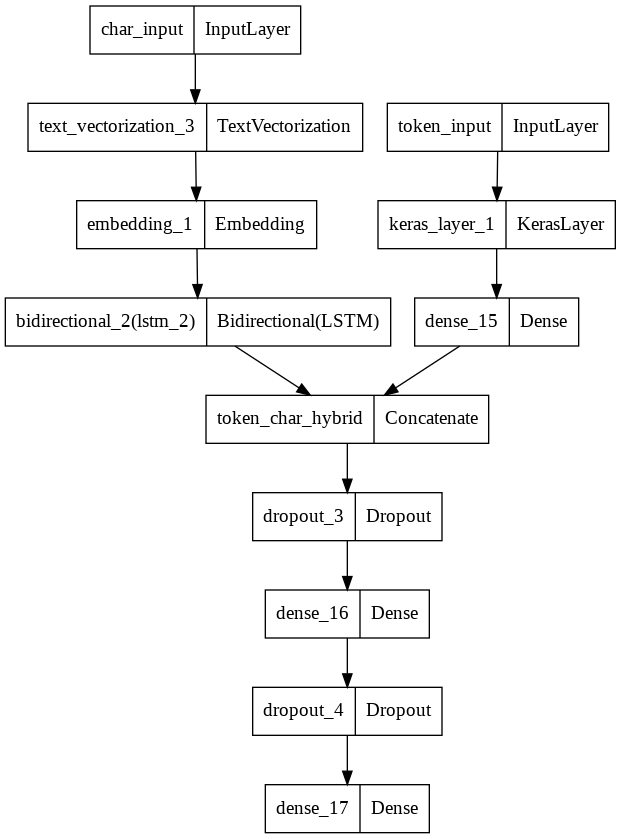

In [ ]:

tf.keras.utils.plot_model(model_4)

In [ ]:
model_4.compile(loss="categorical_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
train_token_char_data= tf.data.Dataset.from_tensor_slices((train_sentences,train_chars))
train_char_token_labels= tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset= tf.data.Dataset.zip((train_token_char_data, train_char_token_labels))

train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_token_char_data

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [ ]:
history_4= model_4.fit(train_char_token_dataset,
                       epochs=3,
                       steps_per_epoch=int(0.1*len(train_char_token_dataset)),
                       validation_data=val_char_token_dataset,
                       validation_steps=int(0.1*len(val_char_token_dataset)))


Epoch 1/3
562/562 [==============================] - 38s 52ms/step - loss: 0.9815 - accuracy: 0.6110 - val_loss: 0.7723 - val_accuracy: 0.7015
Epoch 2/3
562/562 [==============================] - 26s 46ms/step - loss: 0.7935 - accuracy: 0.6937 - val_loss: 0.7116 - val_accuracy: 0.7237
Epoch 3/3
562/562 [==============================] - 24s 42ms/step - loss: 0.7743 - accuracy: 0.7020 - val_loss: 0.6887 - val_accuracy: 0.7404


In [ ]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 21s 22ms/step - loss: 0.6947 - accuracy: 0.7347


[0.6947476267814636, 0.7347411513328552]

In [ ]:
model_4_pred_probs= model_4.predict(val_char_token_dataset)
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 73.47411624520058,
 'f1': 0.7318907144684316,
 'precision': 0.7369509808403586,
 'recall': 0.7347411624520058}

In [ ]:
 train_line_number_one_hot = tf.one_hot(train_df["line_number"].to_numpy(),depth=15)
 val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(),depth=15)
 test_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(),depth=15)
 train_line_number_one_hot[:10], train_line_number_one_hot.shape

(<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
       dtype=float32)>, TensorShape([180040, 15]))

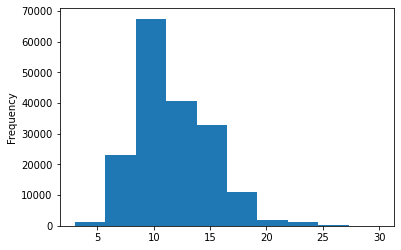

In [ ]:
train_df.total_lines.plot.hist()

In [ ]:
np.percentile(train_df.total_lines,98)

20.0

In [ ]:
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]), <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.

In [ ]:
token_inputs= layers.Input(shape=[],dtype=tf.string, name="token_input")
token_embeddings =tf_hub_embedding_layers(token_inputs)
token_outputs= layers.Dense(128, activation = "relu")(token_embeddings)
token_model = tf.keras.Model(token_inputs, token_outputs)

char_inputs= layers.Input(shape=(1,),dtype=tf.string,name= "char_input")
char_vectors= char_vectorizer(char_inputs)
char_embeddings= char_embed(char_vectors)
char_bi_lstm= layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

line_number_inputs= layers.Input(shape=(15,),dtype=tf.float32, name="line_number_input")
x=layers.Dense(32,activation= "relu")(line_number_inputs)
line_number_model= tf.keras.Model(line_number_inputs,x)

total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(total_lines_inputs, y)

combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output, char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output, total_line_model.output, z])
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)

model_5 = tf.keras.Model(inputs=[line_number_model.input, total_line_model.input,  token_model.input,  char_model.input], outputs=output_layer)

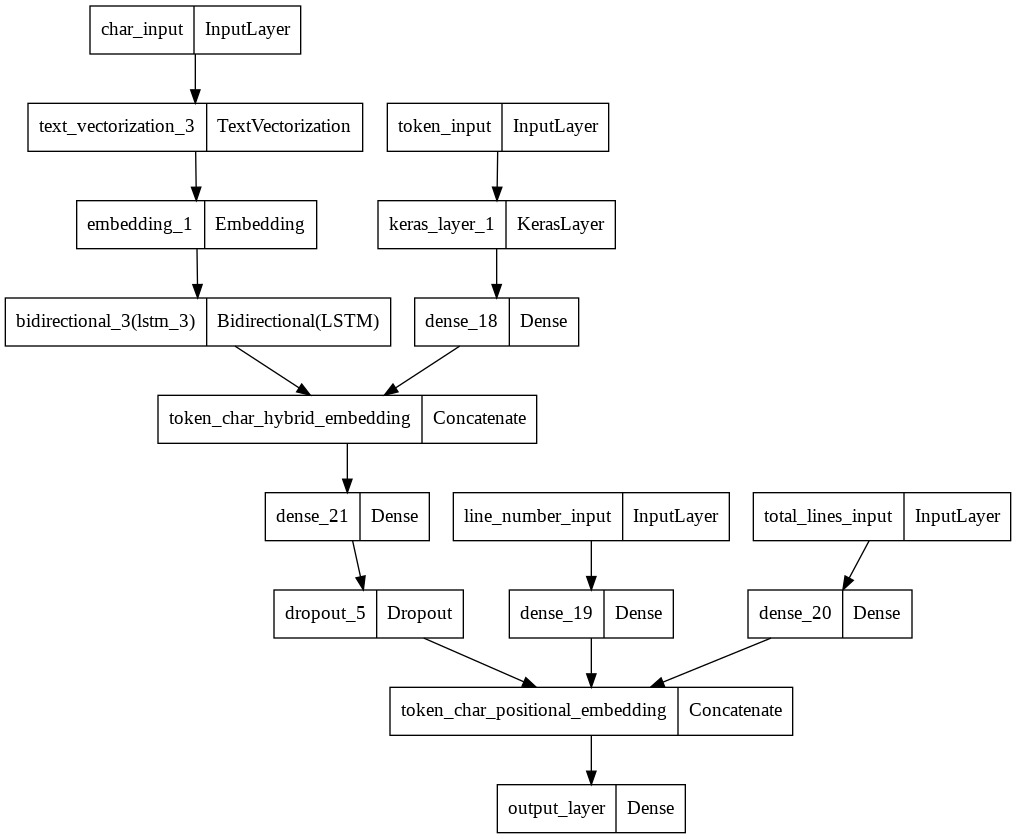

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_5)

In [ ]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer=tf.optimizers.Adam(),
                metrics= ["accuracy"])


In [ ]:
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_number_one_hot, 
                                                                train_total_lines_one_hot,
                                                                train_sentences, 
                                                                train_chars)) 
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) 
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) 
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 


val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_pos_char_token_dataset, val_pos_char_token_dataset

(<PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
history_5 = model_5.fit(train_pos_char_token_dataset,
                        epochs=3,
                        steps_per_epoch=int(0.2*len(train_pos_char_token_dataset)),
                        validation_data= val_pos_char_token_dataset,
                        validation_steps=int(0.2*len(val_pos_char_token_dataset))
                        )

Epoch 1/3
1125/1125 [==============================] - 66s 51ms/step - loss: 1.0320 - accuracy: 0.7684 - val_loss: 0.9445 - val_accuracy: 0.8266
Epoch 2/3
1125/1125 [==============================] - 52s 46ms/step - loss: 0.9432 - accuracy: 0.8302 - val_loss: 0.9235 - val_accuracy: 0.8386
Epoch 3/3
1125/1125 [==============================] - 52s 46ms/step - loss: 0.9371 - accuracy: 0.8343 - val_loss: 0.9116 - val_accuracy: 0.8490


In [ ]:
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset, verbose=1)
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_5_preds)

945/945 [==============================] - 23s 21ms/step
